# Problem 3 Homework 4 CSE 250A Probabilistic Reasoning & Learning

**a)** 
 
Compute the maximum likelihood estimate of the unigram distribution $P_{u}(w)$ over words $w$. Print out
a table of all the tokens (i.e., words) that start with the letter “M”, along with their numerical unigram
probabilities (not counts).

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Import vocabulary and unigrams as pandas dataframes
vocab_data = pd.read_csv('hw4_vocab.txt',sep="\t",quoting=csv.QUOTE_NONE,header=None,names=["Words"])
unigram_data = pd.read_csv('hw4_unigram.txt',sep="\t", header=None,names=["Count"])

# Add a column for the unigram probabilities in the vocab dataframe
vocab_data["Unigram Probs"] = unigram_data["Count"]/unigram_data["Count"].sum()

# Print the words starting with M and their probabilities
vocab_data[vocab_data["Words"].str.startswith("M")]

,Words,Unigram Probs
53,MILLION,0.002073
68,MORE,0.001709
76,MR.,0.001442
120,MOST,0.000788
121,MARKET,0.000780
125,MAY,0.000730
129,M.,0.000703
130,MANY,0.000697
158,MADE,0.000560
177,MUCH,0.000515


<div style="page-break-after: always;"></div>

**b)**

Compute the maximum likelihood estimate of the bigram distribution $P_{b}(w'|w)$. Print out a table of
the ten most likely words to follow the word “THE”, along with their numerical bigram probabilities.

In [2]:
# Read the bigram file as a dataframe
bigram_data = pd.read_csv('hw4_bigram.txt',sep="\t",header=None,names=["w1","w2","count(w1,w2)"])
# Retrieve the index of the word "THE" in the previous dataframe
index = vocab_data.index
condition = vocab_data["Words"] == "THE"
the_index_list = index[condition]
the_index = the_index_list[0]+1

# Make a new dataframe with only the "THE" word as "w1" 
the_bigram = bigram_data[bigram_data["w1"]==the_index]

# Save the bigram probabilities as a column in the bigram dataframe
word_sum = the_bigram["count(w1,w2)"].sum()
the_bigram["Bigram Probs"] = the_bigram["count(w1,w2)"]/word_sum
the_bigram = the_bigram.sort_values("Bigram Probs", ascending=False)
ten_words_after_the = the_bigram.head(10)
print(ten_words_after_the)

print("\n We access the words from the vocab dataframe to print them out nicely")

# Save words and probabilities as lists to print out nicely
bigram_prob_list = ten_words_after_the["Bigram Probs"].tolist()
second_word = []
# Add all second words to list to easily print out
second_word.extend((vocab_data.loc[0,"Words"],vocab_data.loc[69,"Words"],vocab_data.loc[78,"Words"],vocab_data.loc[72,"Words"],vocab_data.loc[60,"Words"],vocab_data.loc[183,"Words"],vocab_data.loc[102,"Words"],vocab_data.loc[38,"Words"],vocab_data.loc[307,"Words"],vocab_data.loc[22,"Words"]))
for i in range(len(second_word)):
    if (second_word[i]=="GOVERNMENT"):
        print("Word: {} \t Probability: {}".format(second_word[i], round(bigram_prob_list[i],6)))
    else:
        print("Word: {} \t \t Probability: {}".format(second_word[i], round(bigram_prob_list[i],6)))


      w1   w2  count(w1,w2)  Bigram Probs
993    4    1       2371132      0.615020
1058   4   70         51556      0.013372
1064   4   79         45186      0.011720
1060   4   73         44949      0.011659
1050   4   61         36439      0.009451
1165   4  184         33435      0.008672
1086   4  103         26230      0.006803
1029   4   39         25641      0.006651
1282   4  308         24239      0.006287
1014   4   23         23752      0.006161

 We access the words from the vocab dataframe to print them out nicely
Word: <UNK> 	 	 Probability: 0.61502
Word: U. 	 	 Probability: 0.013372
Word: FIRST 	 	 Probability: 0.01172
Word: COMPANY 	 	 Probability: 0.011659
Word: NEW 	 	 Probability: 0.009451
Word: UNITED 	 	 Probability: 0.008672
Word: GOVERNMENT 	 Probability: 0.006803
Word: NINETEEN 	 	 Probability: 0.006651
Word: SAME 	 	 Probability: 0.006287
Word: TWO 	 	 Probability: 0.006161


<div style="page-break-after: always;"></div>

**c)**

Consider the sentence **“The stock market fell by one hundred points last week.”** Ignoring punctuation,
compute and compare the log-likelihoods of this sentence under the unigram and bigram models:

$$\mathcal{L}_{u} = log[P_{u}(\bf(The))P_{u}(\bf(stock))P_{u}(\bf(market))...P_{u}(\bf(last))P_{u}(\bf(week))]$$
$$\mathcal{L}_{b} = log[P_{b}(\bf(The|<s>))P_{b}(\bf(stock|the))P_{b}(\bf(market|stock))...P_{b}(\bf(last|points))P_{b}(\bf(week|last))]$$

In the equation for the bigram log-likelihood, the token $<s>$ is used to mark the beginning of a sentence.
Which model yields the highest log-likelihood?

In [3]:
# I see now that I should have saved bigram probabilities for all words, so I will do that
bigram_probs = []
for index,row in bigram_data.iterrows():
    bigram_probs.append(row["count(w1,w2)"]/unigram_data.iloc[row["w1"]-1]["Count"])
bigram_data["Bigram Probs"] = bigram_probs

In [4]:
sentence1 = "THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK"
sentence1 = sentence1.split()
indeces1 = []
for word in sentence1:
    index = vocab_data.index
    condition = vocab_data["Words"] == word
    word_index = index[condition]
    indeces1.append(word_index[0])

In [5]:
# Unigram log-likelihood
Lu = 0
for index in indeces1:
    Lu += np.log(vocab_data.iloc[index]["Unigram Probs"])
print(f"Unigram log-likelihood: {np.round(Lu,5)}")

Unigram log-likelihood: -64.50944


In [6]:
sentence2 = "<s> THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK"
sentence2 = sentence2.split()
indeces2 = []
for word in sentence2:
    index = vocab_data.index
    condition = vocab_data["Words"] == word
    word_index = index[condition]+1
    indeces2.append(word_index[0])

In [13]:
# Bigram log-likelihood
Lb = 0
for i in range(len(indeces2)-1):
    # Last word on the line is .values[0]
    Lb+=np.log(bigram_data[(bigram_data["w1"]==indeces2[i])&(bigram_data["w2"]==indeces2[i+1])]["Bigram Probs"].values[0])
print(f"Bigram log-likelihood: {np.round(Lb,5)}")

Bigram log-likelihood: -40.91813


We observe that the bigram model yields a better log-likelihood. 

<div style="page-break-after: always;"></div>

**d)**

Consider the sentence **“The sixteen officials sold fire insurance.”** Ignoring punctuation,
compute and compare the log-likelihoods of this sentence under the unigram and bigram models:

$$\mathcal{L}_{u} = log[P_{u}\bf(The)P_{u}\bf(sixteen)P_{u}\bf(officials)...P_{u}\bf(fire)P_{u}\bf(insurance)]$$
$$\mathcal{L}_{b} = log[P_{b}\bf(The|<s>)P_{b}\bf(sixteen|the)P_{b}\bf(officials|sixteen)...P_{b}\bf(fire|sold)P_{b}\bf(insurance|fire)]$$

Which pairs of adjacent words in this sentence are not observed in the training corpus? What effect
does this have on the log-likelihood from the bigram model?

In [8]:
sentence3 = "THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
sentence3 = sentence3.split()
indeces3 = []
for word in sentence3:
    index = vocab_data.index
    condition = vocab_data["Words"] == word
    word_index = index[condition]
    indeces3.append(word_index[0])

In [9]:
# Unigram log-likelihood
Lu = 0
for index in indeces3:
    Lu += np.log(vocab_data.iloc[index]["Unigram Probs"])
print(f"Unigram log-likelihood: {np.round(Lu,5)}")

Unigram log-likelihood: -44.29193


In [10]:
sentence4 = "<s> THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
sentence4 = sentence4.split()
indeces4 = []
for word in sentence4:
    index = vocab_data.index
    condition = vocab_data["Words"] == word
    word_index = index[condition]+1
    indeces4.append(word_index[0])

In [15]:
# Bigram log-likelihood
Lb = 0
for i in range(len(indeces4)-1):
    try:
        # Last word on the line is .values[0]
        prob = bigram_data[(bigram_data["w1"]==indeces4[i])&(bigram_data["w2"]==indeces4[i+1])]["Bigram Probs"].values[0]
    except IndexError:
        print(f"The combination of {sentence4[i]} and {sentence4[i+1]} is not present in the bigram data, resulting in log(0) which is -inf")
        Lb = float('-inf')
    else:
        Lb+=np.log(prob)
print(f"Bigram log-likelihood: {np.round(Lb,5)}")
#print(f"The combination of {sentence4[i]} and {sentence4[i+1]} is not present in the bigram data")

The combination of SIXTEEN and OFFICIALS is not present in the bigram data, resulting in log(0) which is -inf
The combination of SOLD and FIRE is not present in the bigram data, resulting in log(0) which is -inf
Bigram log-likelihood: -inf


<div style="page-break-after: always;"></div>

**e)**

Consider the so-called mixture model that predicts words from a weighted interpolation of the unigram
and bigram models: $$P_{m}(w'|w) = \lambda P_{u}(w') + (1-\lambda)P_{b}(w'|w)$$ where $\lambda \in [0,1]$ determines how much weight is attached to each prediction. Under this mixture model, the log-likelihood of the sentence from part (d) is given by: $$\mathcal{L}_{m} = log[P_{m}\bf(The|<s>)P_{m}\bf(sixteen|the)P_{m}\bf(officials|sixteen) ... P_{m}\bf(fire|sold)P_{m}\bf(insurance|fire)].$$ Compute and plot the value of this log-likelihood $\mathcal{L}_{m}$ as a function of the parameter $\lambda \in [0,1]$. From your results, deduce the optimal value of $\lambda$ to two significant digits.

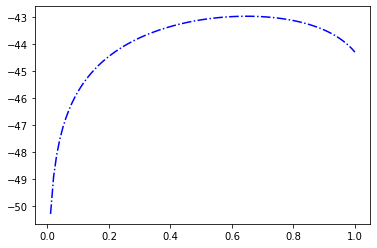

Highest lambda value is 0.65


In [12]:
sentence5 = "<s> THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
sentence5 = sentence5.split()
indeces5 = []
for word in sentence5:
    index = vocab_data.index
    condition = vocab_data["Words"] == word
    word_index = index[condition]+1
    indeces5.append(word_index[0])

def mixture_prob(lam, p_uni, p_bi):
    return (np.log(lam*p_uni+(1-lam)*p_bi))

def mixture_mle(sentence5, lam):
    p = 0
    for i in range(len(sentence5) - 1):
        p_uni = vocab_data[vocab_data["Words"]==sentence5[i+1]]["Unigram Probs"].values[0]
        try:
            # Last word on the line is .values[0]
            p_bi=bigram_data[(bigram_data["w1"]==indeces5[i])&(bigram_data["w2"]==indeces5[i+1])]["Bigram Probs"].values[0]
        except IndexError:
            p_bi = 0
        p_ = mixture_prob(lam,p_uni,p_bi)
        p += p_
    return p

x = []
y = []
for i in np.linspace(0.01, 1, 100):
    x.append(i)
    y.append(mixture_mle(sentence5, i))
plt.plot(x, y, 'b-.')
plt.show()

np.array(x)
np.array(y)
print(f"Highest lambda value is {round(x[np.argmax(y)],2)}")

